Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Libraries


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Data preprocessing

Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit Recognition System/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 3217 files belonging to 36 classes.


Validation Image preprocessing


In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit Recognition System/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


Building model


In [ ]:
cnn = tf.keras.models.Sequential()

Building Convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and training Phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
101/101 [==============================] - 111s 1s/step - loss: 3.1774 - accuracy: 0.3671 - val_loss: 1.7932 - val_accuracy: 0.6156
Epoch 2/30
101/101 [==============================] - 105s 998ms/step - loss: 2.6027 - accuracy: 0.4249 - val_loss: 1.5992 - val_accuracy: 0.6546
Epoch 3/30
101/101 [==============================] - 101s 965ms/step - loss: 2.4372 - accuracy: 0.4765 - val_loss: 1.5988 - val_accuracy: 0.6769
Epoch 4/30
101/101 [==============================] - 101s 962ms/step - loss: 2.4762 - accuracy: 0.5216 - val_loss: 1.6361 - val_accuracy: 0.7549
Epoch 5/30
101/101 [==============================] - 105s 1s/step - loss: 1.7531 - accuracy: 0.5791 - val_loss: 1.9811 - val_accuracy: 0.6184
Epoch 6/30
101/101 [==============================] - 103s 983ms/step - loss: 1.8524 - accuracy: 0.6127 - val_loss: 2.2692 - val_accuracy: 0.6212
Epoch 7/30
101/101 [==============================] - 105s 1s/step - loss: 1.9041 - accuracy: 0.6379 - val_loss: 4.1874 - val_accu

Saving Model


In [ ]:
cnn.save('trained_model.h5')

In [ ]:
#Recording History in JSON format
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
training_history.history

{'loss': [11.045400619506836,
  4.653738975524902,
  3.710763692855835,
  3.6197824478149414,
  3.581768035888672,
  3.593733549118042,
  3.5775868892669678,
  3.58294677734375,
  3.5769546031951904,
  3.5862903594970703,
  3.5745105743408203,
  3.5690765380859375,
  3.575274705886841,
  3.6945719718933105,
  3.5785248279571533,
  3.589003801345825,
  3.58343768119812,
  3.6387624740600586,
  3.578839063644409,
  3.571556806564331,
  3.5687978267669678,
  3.572188377380371,
  3.566840171813965,
  3.564624071121216,
  3.5647382736206055,
  3.565767288208008,
  3.565608263015747,
  3.5769617557525635,
  3.5712227821350098,
  3.56268048286438],
 'accuracy': [0.051897503435611725,
  0.08952318876981735,
  0.03470645472407341,
  0.029192345216870308,
  0.031462859362363815,
  0.029841063544154167,
  0.03340901806950569,
  0.03405773639678955,
  0.03243593871593475,
  0.03697697073221207,
  0.037625689059495926,
  0.037625689059495926,
  0.037625689059495926,
  0.037950050085783005,
  0.0395

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Calculating Accuracy of Model Achieved on Test set

In [ ]:
print('Test set Accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))

Test set Accuracy: 2.0270269364118576 %


Accuracy Visualization

Training Visualization

In [ ]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title("Visualization of Training Accuracy Result")
plt.show()

Validation Visualization

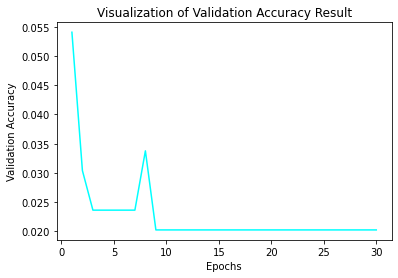

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='cyan')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title("Visualization of Validation Accuracy Result")
plt.show()